Title: When to Use Box Plots
Slug: when-use-box-plots
Summary: Examples of datasets to illustrate when to use box plots to visualize the distribution of a continous variable
Date: 2018-06-11 22:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: box plots
Keywords: when use box plots
Authors: Dan Friedman

**Box plots** help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables too.

Box plots *typically* detail the minimum value, 25th percentile (aka Q1), median (aka 50th percentile), 75th percentile (aka Q3) and the maximum value in a visual manner. 

Note: different software and libraries such as Microsoft Excel, Seaborn and others may place the end whiskers and show outliers differently on box plots. Please understand your software's implementation well when you need to interpret results.

Often times, the aspects of a box plot are:
 
![Box plot visualization](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwcN_FnbXzeCRzdORCAHXUBX-7RjoyUnkW86ok_rpPwtV1EwTC)

You can learn more in detail about box and whisker plots through this [Khan Academy article](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review).

Percentiles are frequently used in comparisons in the real-world. For example, in my high school graduating class, my GPA ranked in the top 25th percentile. That means I had a higher GPA than 75% of students in my graduating class.

#### Import Modules

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### Example: Resting Heart Rate (Pulse) 

In this public dataset, there's a sample of people's heart rates taken. To perform that measurement, people measured the number of times their heart beated in a single minute. The count of beats per minute is also called a pulse.

#### Load Exercise Dataset

In [4]:
df_exercise = sns.load_dataset('exercise')

#### Preview Exercise Dataset

Below, you can see a random sample of 5 rows of data. Note how each row represents health/exercise metrics for a single person and tracks their heart rate (pulse) as well as what kind of activity was done before the heart rate measurement.

In [65]:
df_exercise.sample(n=5)

,Unnamed: 0,id,diet,pulse,time,kind
56,56,19,no fat,100,30 min,walking
34,34,12,low fat,103,15 min,walking
73,73,25,low fat,110,15 min,running
31,31,11,low fat,86,15 min,walking
72,72,25,low fat,94,1 min,running


#### Plot Resting Pulse Data

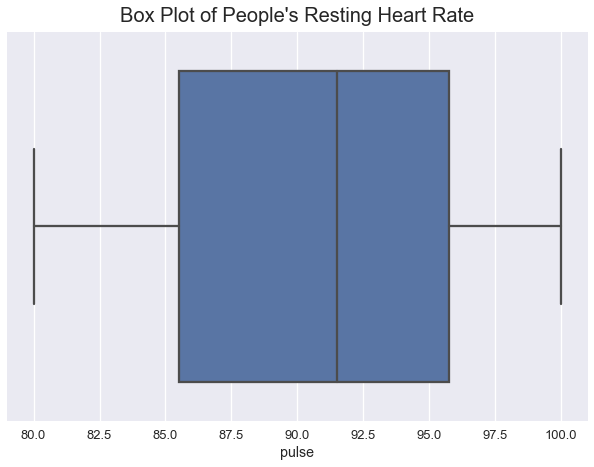

In [60]:
sns.set_context("talk")
ax = sns.boxplot(x=df_exercise[df_exercise['kind']=='rest']['pulse'])
ax.axes.set_title("Box Plot of People's Resting Heart Rate", fontsize=20, y=1.01);

#### Interpreting Pulse Data Quartiles

The median resting heart rate is roughly 92 beats per minute. 

The minimum recorded resting heart rate is 80 beats per minute and the maximum is 100 beats per minute.

75% of people recorded a resting heart rate above 85.5 beats per minute. 25% of people recorded a resting heart rate above 95.75 beats per minute.

Also, in order to see exact numeric values of the quartiles in a box and whisker plot, you can also print out those values in a table format similar to the one below:

In [9]:
df_exercise[df_exercise['kind']=='rest']['pulse'].describe()

count     30.000000
mean      90.833333
std        5.831445
min       80.000000
25%       85.500000
50%       91.500000
75%       95.750000
max      100.000000
Name: pulse, dtype: float64

### Example: Heart Rate Comparison for Resting, Walking and Running

In the example above, the visual box plot tells a similar story to the printed table results. 

However, the visual representation of box plots becomes more valuable with side-to-side comparisons by a categorical variable. I want to know how the distribution of heart rate differs for people resting, walking and running. I'd assume that with more exercise activity, the median heart rate increases.

#### Box Plot for Heart Rate Comparisons by Activity

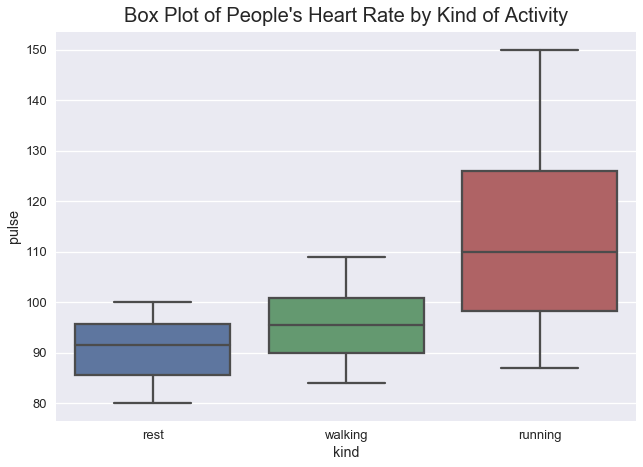

In [58]:
ax2 = sns.boxplot(x='kind', y='pulse', data=df_exercise, saturation=0.65)
ax2.axes.set_title("Box Plot of People's Heart Rate by Kind of Activity", fontsize=20, y=1.01);

#### Interpretation of Heart Rate by Activity

As expected, the median heart increases by the level of exercise activity. There's a significant jump in the median heart rate for those running from walking since running is a strenous exercise activity.

The distribution of recorded heart rates for those running varies much more than the distribution for those recorded after rest or walking. The maximum recorded heart rate for running is 150 beats per minute.

### Example: Distribution of Total Bills by Day of Week

In this public dataset, there's records from restaurant orders. Specifically, we'll look at orders by day of week and the total bill amounts in U.S. dollars.

#### Get Tips Dataset

In [14]:
df_tips = sns.load_dataset('tips')

#### Preview Tips Dataset

Below, you can see a preview of 5 rows of the dataset. Note how each row represents meal order and there's fields for total bill amount and day of the week.

In [66]:
df_tips.sample(n=5)

,total_bill,tip,sex,smoker,day,time,size
27,12.69,2.0,Male,No,Sat,Dinner,2
217,11.59,1.5,Male,Yes,Sat,Dinner,2
220,12.16,2.2,Male,Yes,Fri,Lunch,2
67,3.07,1.0,Female,Yes,Sat,Dinner,1
200,18.71,4.0,Male,Yes,Thur,Lunch,3


#### Plot Distribution of Total Bill Amount by Day

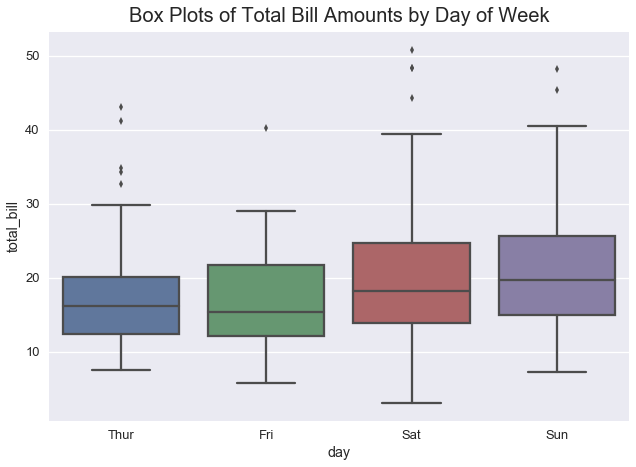

In [59]:
ax3 = sns.boxplot(x="day", y="total_bill", data=df_tips, saturation=0.6)
ax3.axes.set_title("Box Plots of Total Bill Amounts by Day of Week", fontsize=20, y=1.01);

#### Interpretation of Outliers for Thursday

The Python visualization library I use in the example above is called Seaborn. Their calculation of outliers in box plots is as so: any point in which the value is greater than (Q3-Q1)*1.5 + Q3. 

For total_bill values on Thursday, the leftmost boxplot, we can see 5 outliers. Let's calculate that threshold that determines total_bills as outliers. 

First, we need to identify the exact Q3 and Q1 values.

In [67]:
Q1 = df_tips[df_tips['day']=='Thur']['total_bill'].quantile(0.25)
Q3 = df_tips[df_tips['day']=='Thur']['total_bill'].quantile(0.75)

In [68]:
outlier_threshold = (Q3-Q1)*1.5 + Q3

In [69]:
round(outlier_threshold, 2)

31.72

Any total bill value greater than 31.72 U.S. dollars on Thursday is considered an outlier. 

Let's examine the data to see how many outliers exist. The math below queries our tips dataset for orders on Thursday and greater than 31.72 U.S. dollars. We see 5 outliers. If we look at the Thursday box plot above, we see those 5 outliers plotted.

In [56]:
df_tips[(df_tips['day']=='Thur') & (df_tips['total_bill']>31.71)]['total_bill'].values

array([ 32.68,  34.83,  34.3 ,  41.19,  43.11])

#### Interpretation of Box Plots of Total Bill Amounts By Day

For total bill amounts on Thursday, the maximum *non-outlier* value is ~30 U.S. dollars. 

Generally, people spend more money at this restaurant on weekends, Saturdays and Sundays, than weekdays since the median total bill of Saturday and Sunday are greater than the median values of Thursday and Friday.

On weekends, there's much more variance in people's spending patterns for meals than on weekdays.

Saturday has the highest recorded outlier at over 50 U.S. dollars.